# Song popularity prediction using Spotify data

# Problem Statement

This project aims to develop a predictive model for identifying the most popular songs on Spotify, using data science and machine learning techniques to uncover patterns and characteristics that influence song popularity.

**What are the key attributes that influence the popularity of songs on Spotify?**

# Import libraries and data

In [1]:
# Import libraries
!pip install dataprep
import dataprep
from dataprep.eda import plot
import pandas as pd
import numpy as np
import scipy
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from sklearn import preprocessing
import time
from sklearn.preprocessing import MinMaxScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 102.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 97.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.9 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252699 sha256=251f4ab0ab0e5

In [27]:
# Load dataset
data = pd.read_csv('/content/spotify_data.csv')

# Dataset Overview

In [28]:
# Preview data
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [29]:
# Self defined function to check data type, number of unique values, number of missing values and total number of rows
def check(data):
    l=[]
    columns=data.columns
    for col in columns:
        dtypes=data[col].dtypes
        nunique=data[col].nunique()
        sum_null=data[col].isnull().sum()
        num_rows = len(data[col])
        l.append([col,dtypes,nunique,sum_null, num_rows])
    data_check=pd.DataFrame(l)
    data_check.columns=['Column','Data types','Number of unique values',
                      'Number of missing values','Number of rows']
    return data_check
check(data)

,Column,Data types,Number of unique values,Number of missing values,Number of rows
0,Unnamed: 0,int64,1159764,0,1159764
1,artist_name,object,64159,0,1159764
2,track_name,object,882361,0,1159764
3,track_id,object,1159764,0,1159764
4,popularity,int64,98,0,1159764
5,year,int64,24,0,1159764
6,genre,object,82,0,1159764
7,danceability,float64,1364,0,1159764
8,energy,float64,3116,0,1159764
9,key,int64,12,0,1159764


The dataset contains 19 columns (15 numerical and 4 categorical) and 1159764 rows. There are no missing values.

# Data Dictionary

**Independent Variables**


1.   **artist_name:** Artists featured in the song *(categorical)*.
2.   **track_name:** Title of the song *(categorical)*.
3.   **track_id**: Spotify ID for the song *(categorical)*.
4.   **year**: Year of release *(numerical: 2000 to 2023).*
5.   **genre:** Genre of the song *(categorical)*.
6.   **danceability**: How suitable a song is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable *(numerical: 0.0 to 1.0)*.
7.   **energy**: Perceptual measure of intensity and activity *(numerical: 0.0 to 1.0)*.
8.   **key:** The key the track is in. Standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1 *(numerical: -1 to -11)*.
9.   **loudness:** Overall loudness of the song in decibels. Loudness is the quality of a sound (amplitude) *(numerical: -60 to 0 dB)*.
10.  **mode:** Modality of a track. It's the melodic content *(numerical: Major: 1, Minor: 0)*.
11.  **speechiness:** Presence of spoken words in a track *(numerical: 0.0 to 1.0)*.
12.  **acousticness**: Confidence measure of whether the song is acoustic. 1.0 represents high confidence the song is acoustic *(numerical: 0.0 to 1.0)*.
13.  **instrumentalness:** Whether a song contains no vocals. A high instrumentalness means the track doesn't contain vocals. Values above 0.5 represent instrumental tracks, but confidence is higher as the value approaches 1.0 *(numerical: 0.0 to 1.0)*.
14.  **liveness:** Presence of an audience in the recording. A high liveness represents a high probability that the track was performed live. Values above 0.8 represent that the track is live *(numerical: 0.0 to 1.0)*.
15.  **valence:** Musical positiveness. A high valence sounds more positive (e.g. happy, cheerful, euphoric). A low valence sounds more negative (e.g. sad, depressed, angry) *(numerical: 0.0 to 1.0)*.
16.  **tempo**: Tempo of a track in beats per minute (BPM). Tempo is the speed or pace of a given piece *(numerical)*.
17.  **duration_ms:** Duration of the song in milliseconds *(numerical).*
18.  **time_signature:** Estimated time signature, indicate how many beats are in each measure of a piece of music *(numerical: 3 to 7)*.

**Dependent Variable**

19.   **popularity:** Total number of plays the song has had and how recent those plays are *(numerical: 0 to 100)*.
























# Data Preprocessing

# Duplicates

In [30]:
# Number of duplicates
data.duplicated().sum()

0

There are no duplicates in the dataset.

# New columns

In [31]:
# Duration_mins
data['duration_mins'] = data['duration_ms'] / 60000

A new column ('duration_mins') is added as it's easier for analysis to have minutes instead of milliseconds (minutes = milliseconds/60000)

# Sort dataset

In [32]:
# Create a sorted dataframe by popularity
sort_data = data.sort_values('popularity', ascending=False).reset_index()
data_ordered = sort_data.drop(['index'], axis=1)
data_ordered.index = data_ordered.index + 1

The data was sorted by popularity for ease of visualisation.

# Irrelevant columns

In [33]:
# Drop irrelevant columns
data_ordered = data_ordered.drop(columns=['Unnamed: 0','track_id', 'duration_ms'],axis=1)

# Cleaned dataset

In [34]:
# Overview of the cleaned dataset
data_ordered.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
1,Miley Cyrus,Flowers,100,2023,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,4,3.340917
2,Bizarrap,"Shakira: Bzrp Music Sessions, Vol. 53",96,2023,hip-hop,0.778,0.632,2,-5.600,0,0.0493,0.2740,0.000000,0.0915,0.498,122.104,4,3.638150
3,The Weeknd,Die For You - Remix,95,2023,pop,0.531,0.525,1,-6.500,0,0.0671,0.2320,0.000000,0.4410,0.502,66.900,4,3.880950
4,SZA,Kill Bill,94,2022,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,4,2.565783
5,Manuel Turizo,La Bachata,93,2022,pop,0.835,0.679,7,-5.329,0,0.0364,0.5830,0.000002,0.2180,0.850,124.980,4,2.710633


The cleaned dataset contains 18 columns (15 numerical and 3 categorical).

# EDA

# Categorical variables

In [96]:
# Categorical columns
cat_cols = ['artist_name', 'track_name', 'genre']

In [97]:
# Descriptive stats for categorical variables
data_ordered[cat_cols].describe()

,artist_name,track_name,genre
count,1001373,1001373,1001373
unique,61445,760153,82
top,Grateful Dead,Intro,gospel
freq,2320,383,21564


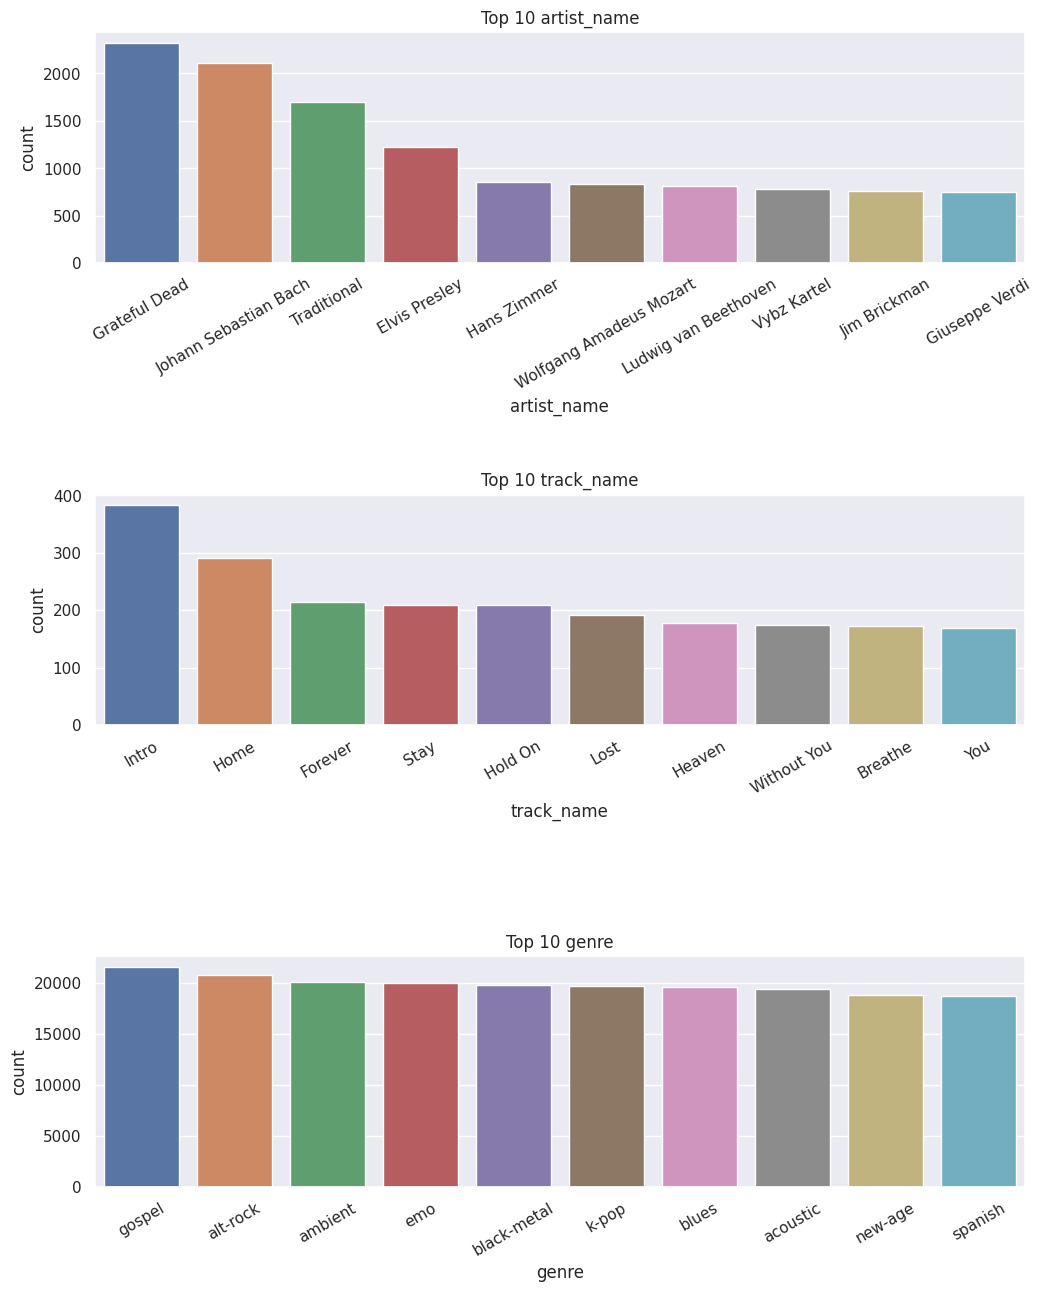

In [94]:
# Create bar charts for the top 10 values of each categorical column

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cat_cols):
    top_10 = data_ordered[col].value_counts().head(10)
    sns.countplot(x=col, data=data_ordered, order=top_10.index, ax=ax[i])
    ax[i].set_title(f'Top 10 {col}')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

plt.show()

The most listened-to artist is Grateful Dead, and the most listened-to song is Intro. Gospel is the most listened-to genre, but only by a small margin, as alt-rock, ambient and emo also have over 20,000 plays.

# Numerical variables

In [38]:
# Numerical variables
num_cols = ['popularity', 'year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']

In [39]:
# Descriptive stats for numerical variables
data_ordered[num_cols].describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature
count,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06,1.159764e+06
mean,1.838312e+01,2.011955e+03,5.374382e-01,6.396699e-01,5.287778e+00,-8.981353e+00,6.346533e-01,9.281477e-02,3.215370e-01,2.523489e-01,2.230189e-01,4.555636e-01,1.213771e+02,4.159363e+00,3.885879e+00
std,1.588554e+01,6.803901e+00,1.844780e-01,2.705009e-01,3.555197e+00,5.682215e+00,4.815275e-01,1.268409e-01,3.549872e-01,3.650731e-01,2.010707e-01,2.685190e-01,2.977975e+01,2.490436e+00,4.676967e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.455000e-02,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879700e+01,3.018183e+00,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,3.762400e+00,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,4.781892e+00,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,1.000083e+02,5.000000e+00


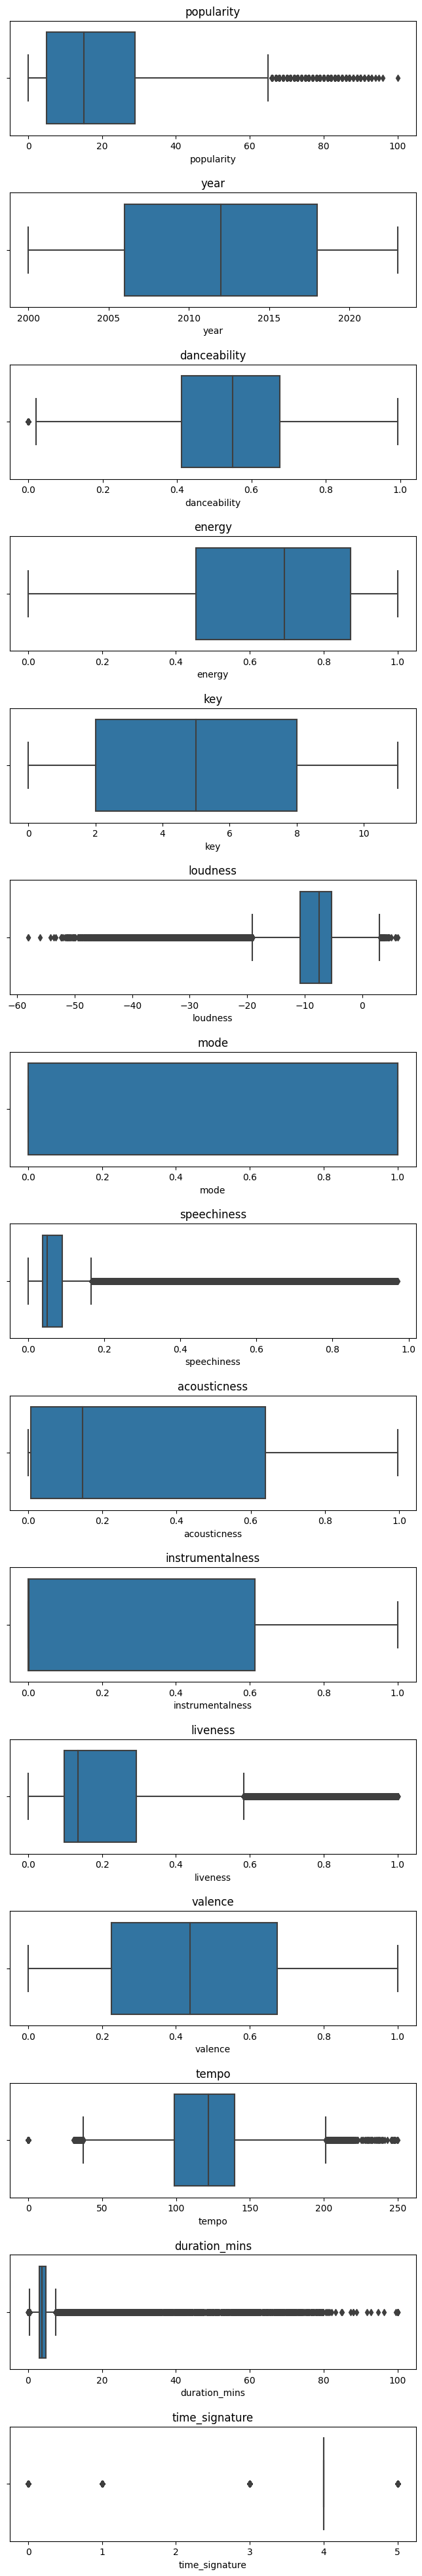

In [40]:
# Generate individual box plots for numerical variables
fig, ax = plt.subplots(nrows=15, ncols=1, figsize=(8,50))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=data_ordered, ax=ax[i])
    ax[i].set_title(col)

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'duration_mins'}>, <Axes: >]],
      dtype=object)

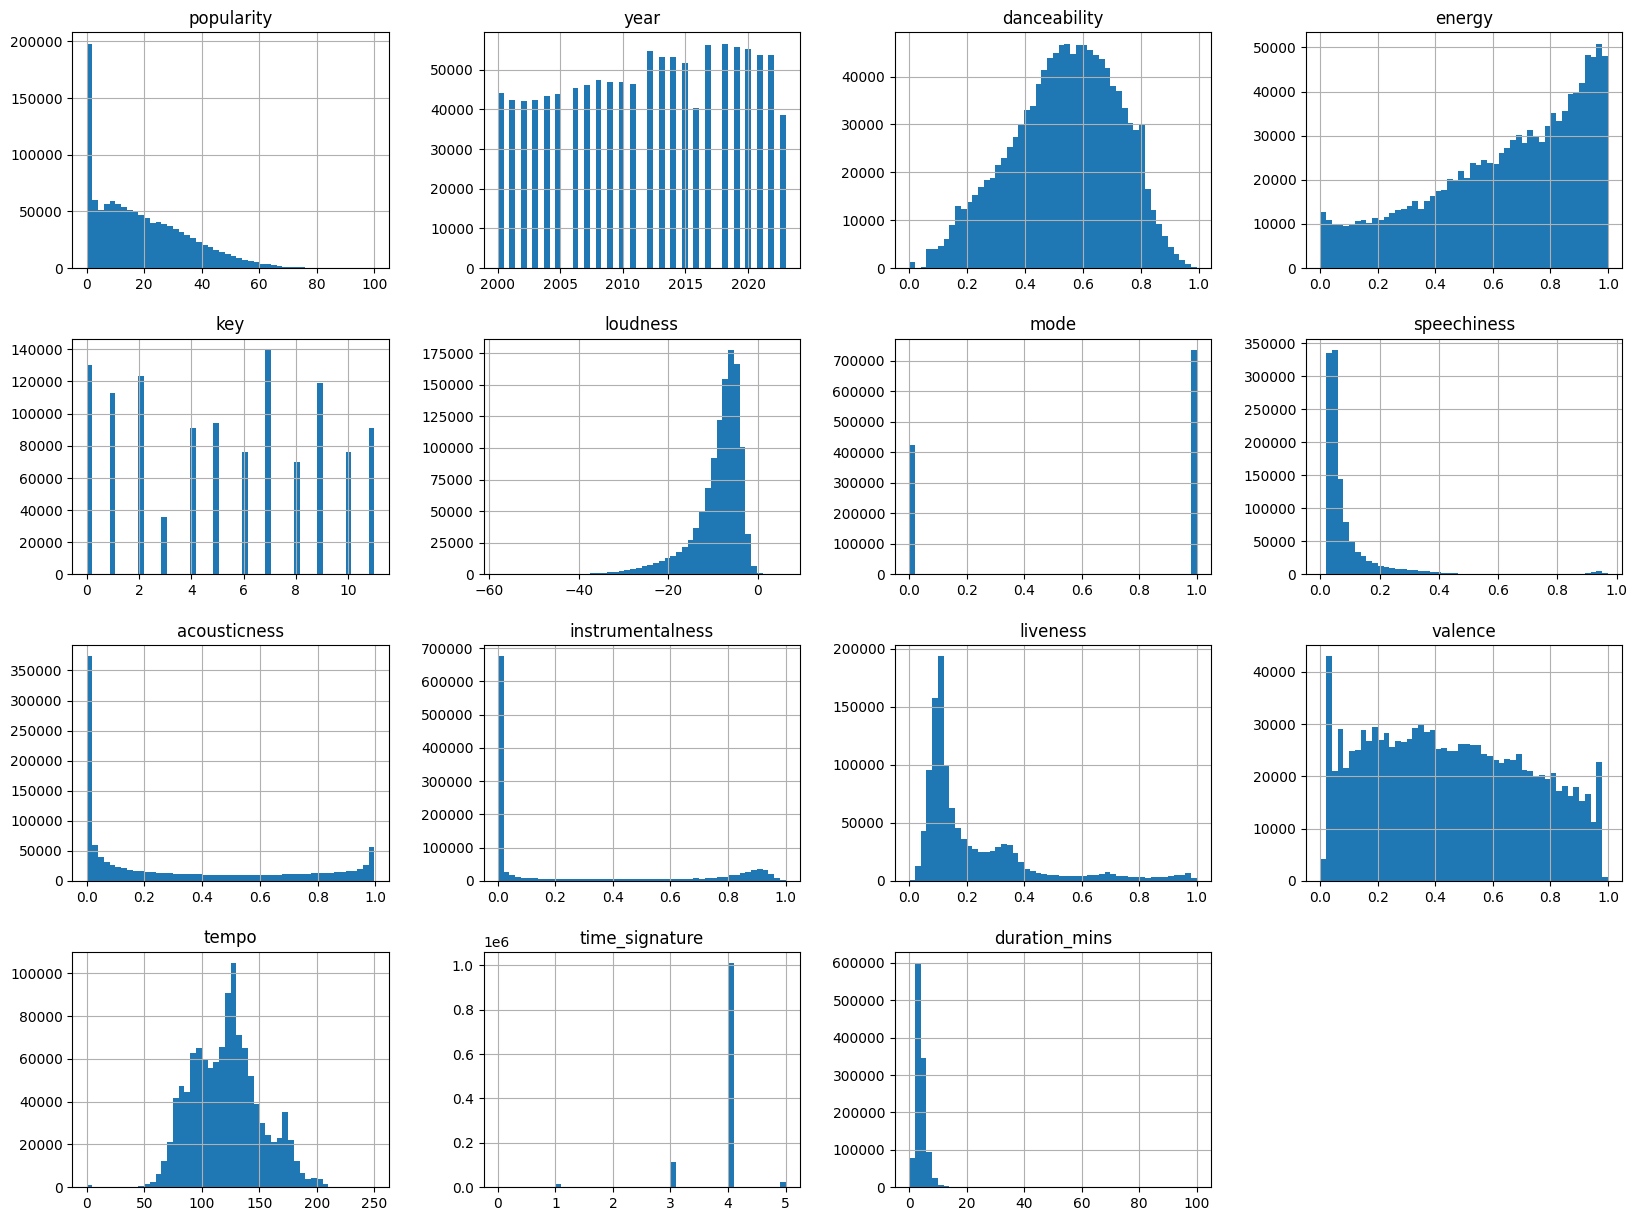

In [42]:
# Histogram of numerical variables
data_ordered.hist(bins=50, figsize=(20, 15))

# Response variable Transformation

In [43]:
plot(data_ordered, 'popularity')

Output hidden; open in https://colab.research.google.com to view.

The response variable is right skewed.
The 13.7% of the popularity column are zeroes.

We will drop the zeroes to eliminate the noise.

In [44]:
# Drop zeroes
data_ordered = data_ordered[data_ordered.popularity > 0]

In [47]:
data_ordered.shape

(1001373, 19)

The dataset now contains 1001373 rows and 18 columns after removing all observations with a popularity of zero.

In [62]:
plot(data_ordered, 'popularity')

Output hidden; open in https://colab.research.google.com to view.

Even with the zeros removed, the popularity distribution is still concentrated around zero.

To balance the response variable we will split the values into three categories: unpopular, medium and popular.

In [51]:
# Classification of popularity
# "unpopular": 0 - 30
# "medium": 31 to 64
# "popular": 65+

data_classified = data_ordered.copy()
data_classified['popularity_ranking'] = ''

for i, row in data_classified.iterrows():
    score = 'unpopular'
    if (row.popularity > 30) & (row.popularity < 65):
        score = 'medium'
    elif row.popularity >= 65:
        score = 'popular'
    data_classified.at[i, 'popularity_ranking'] = score

In [52]:
data_classified[['track_name', 'popularity', 'popularity_ranking']].head()

,track_name,popularity,popularity_ranking
1,Flowers,100,popular
2,"Shakira: Bzrp Music Sessions, Vol. 53",96,popular
3,Die For You - Remix,95,popular
4,Kill Bill,94,popular
5,La Bachata,93,popular


We can use popularity_ranking (categorical) for applying other model rather than linear regression.

In [61]:
plot(data_classified, 'popularity_ranking')

Output hidden; open in https://colab.research.google.com to view.

Most of the songs are unpopular (74%). Only the 0.8% of the songs are popular.

# Correlations

In [77]:
# Correlation matrix

data_classified.corr()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
popularity,1.000000,0.330474,0.128300,-0.005227,0.002968,0.089483,-0.029699,-0.035673,-0.048313,-0.143145,-0.076398,-0.004357,0.000062,0.027100,-0.118347
year,0.330474,1.000000,0.044924,0.005772,-0.003703,0.016963,-0.030933,0.031124,-0.012113,0.035994,-0.021036,-0.104189,0.017283,0.001949,-0.087225
danceability,0.128300,0.044924,1.000000,0.131769,0.030002,0.262387,-0.053428,0.089268,-0.162568,-0.207397,-0.113480,0.525106,-0.033472,0.178899,-0.055442
energy,-0.005227,0.005772,0.131769,1.000000,0.037817,0.784381,-0.056947,0.121568,-0.751262,-0.219758,0.199459,0.257497,0.262902,0.173244,0.006074
key,0.002968,-0.003703,0.030002,0.037817,1.000000,0.027732,-0.163631,0.013109,-0.033328,-0.004350,-0.004324,0.027432,0.008739,0.010424,0.006534
loudness,0.089483,0.016963,0.262387,0.784381,0.027732,1.000000,-0.021836,0.025995,-0.633849,-0.431553,0.094644,0.300634,0.234755,0.176463,-0.049333
mode,-0.029699,-0.030933,-0.053428,-0.056947,-0.163631,-0.021836,1.000000,-0.023164,0.071922,-0.055933,0.025091,0.015917,-0.004954,-0.018394,-0.040358
speechiness,-0.035673,0.031124,0.089268,0.121568,0.013109,0.025995,-0.023164,1.000000,0.034125,-0.147003,0.287557,0.041276,-0.034756,-0.032244,-0.066919
acousticness,-0.048313,-0.012113,-0.162568,-0.751262,-0.033328,-0.633849,0.071922,0.034125,1.000000,0.137653,-0.038565,-0.117523,-0.237614,-0.170758,-0.059623
instrumentalness,-0.143145,0.035994,-0.207397,-0.219758,-0.004350,-0.431553,-0.055933,-0.147003,0.137653,1.000000,-0.128911,-0.329422,-0.045397,-0.067703,0.153786


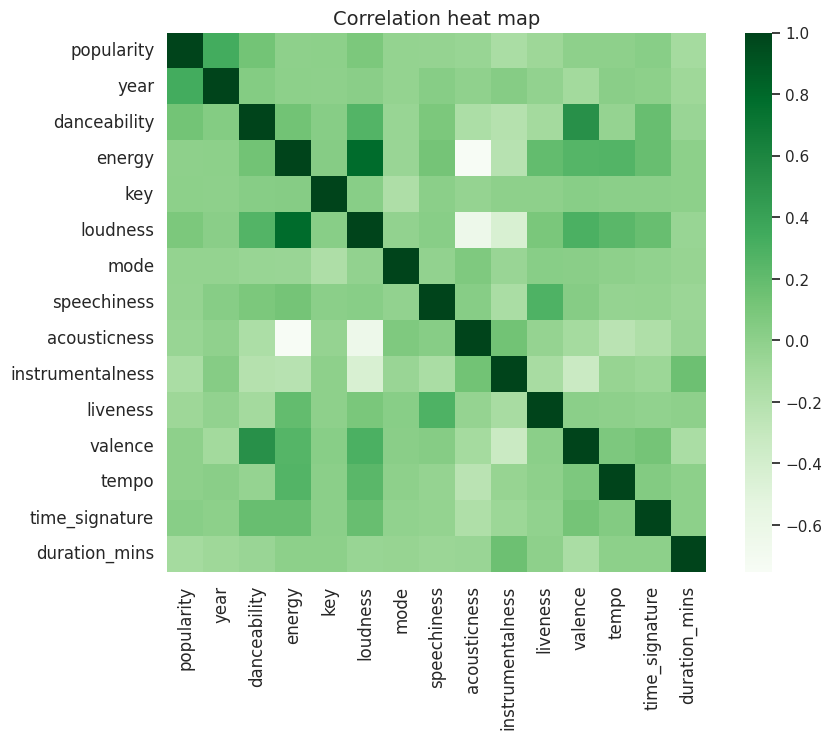

In [75]:
# Heatmap

popularity_ranking = data_classified['popularity_ranking']

fig, ax = plt.subplots(1,1, figsize=(10,7))
_ = sns.heatmap(data_classified.corr(), square=True, cmap='Greens')
_ = plt.title('Correlation heat map', fontsize=14)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

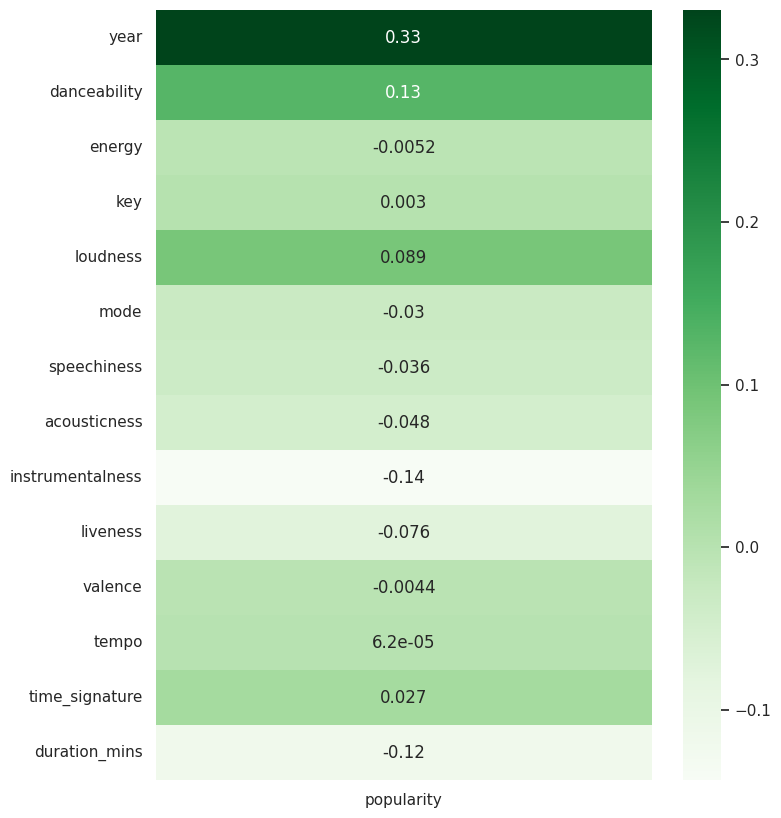

In [76]:
dd = data_classified.corr().loc[['year','danceability','energy','key','loudness','mode','speechiness','acousticness',
                                 'instrumentalness','liveness','valence','tempo','time_signature','duration_mins'],['popularity']]
plt.subplots(figsize=(8, 10))
sns.heatmap(dd,annot=True,cmap="Greens")
sns.set(font_scale = 1)

Year is the variable with the strongest positive correlation with popularity (0.33), followed by danceability (0.13) and loudness (0.089). On the other hand, instrumentalness (-0.14) and duration_mins (-0.12) have the strongest negative correlation with popularity.
However, correlations are not very strong.

# Association between feature variables with the target variable

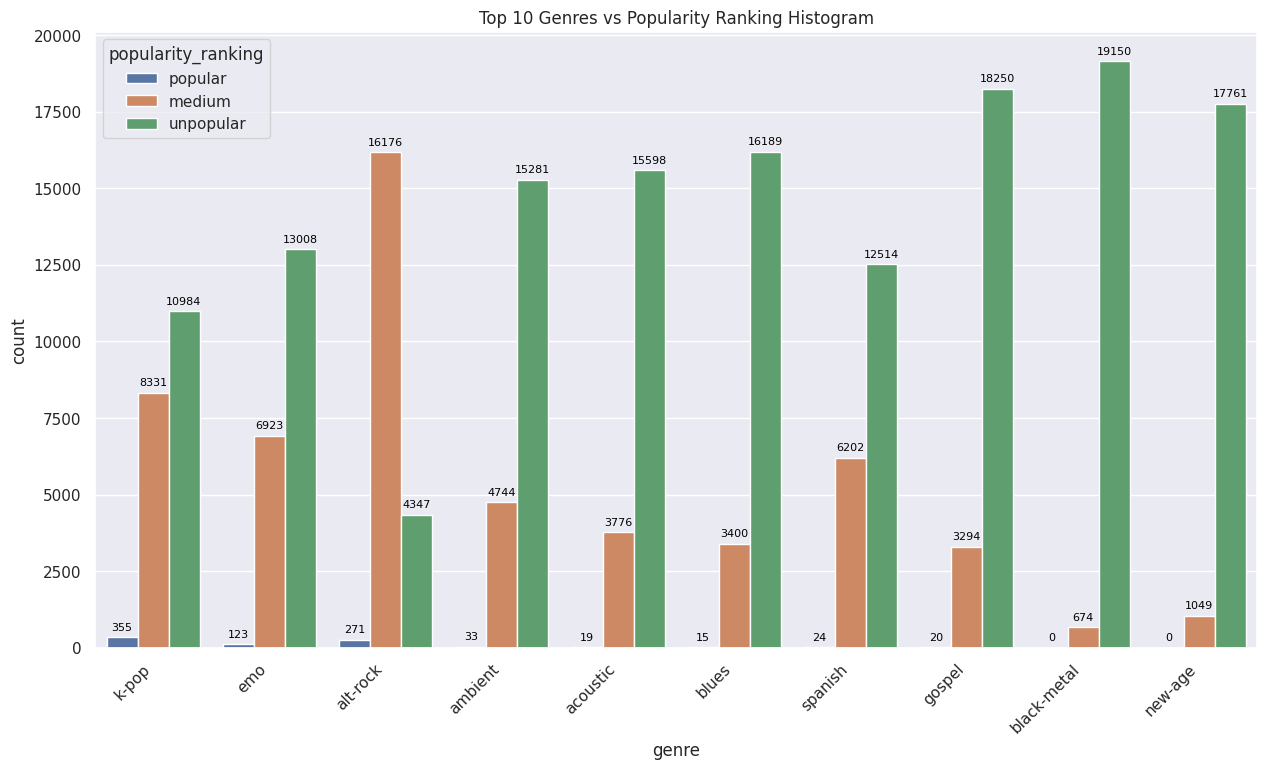

In [98]:
# Categorical pairplot - Genre vs Popularity ranking

top_10_genres = data_classified['genre'].value_counts().nlargest(10).index
filtered_data = data_classified[data_classified['genre'].isin(top_10_genres)]

plt.figure(figsize=(15, 8))

plot = sns.countplot(data=filtered_data, x='genre', hue='popularity_ranking')
plot.set(title='Top 10 Genres vs Popularity Ranking Histogram')
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in plot.patches:
    plot.annotate(f'{p.get_height():.0f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline',
                  fontsize=8, color='black',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.show()

K-pop has the largest number of popular songs, alt-rock has the largest number of medium songs, and black metal has the largest number of unpopular songs.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


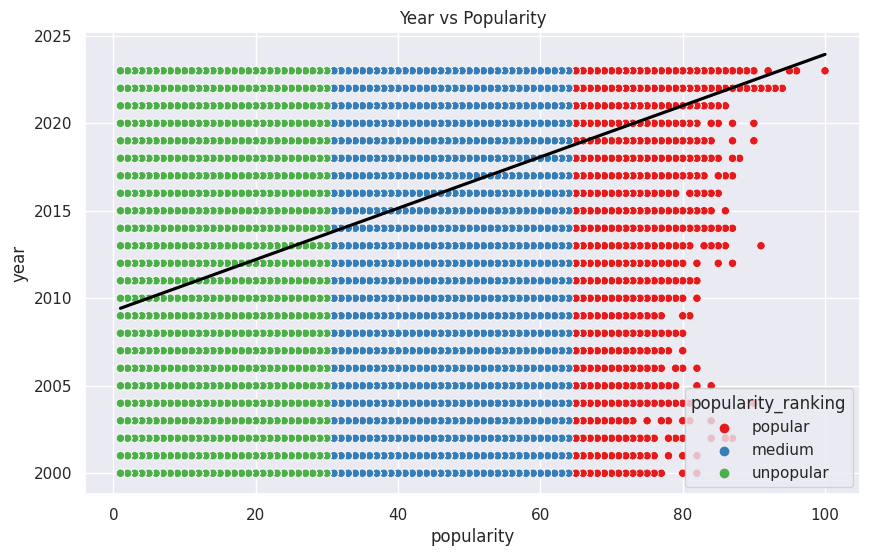

In [128]:
# Scatter plots

# Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='year', data = data_classified, hue = 'popularity_ranking', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Year')
plt.title('Year vs Popularity')
sns.regplot(x='popularity', y='year', data=data_classified, scatter=False, color='black')
plt.show()

The trendline year vs popularity shows a positive correlation.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


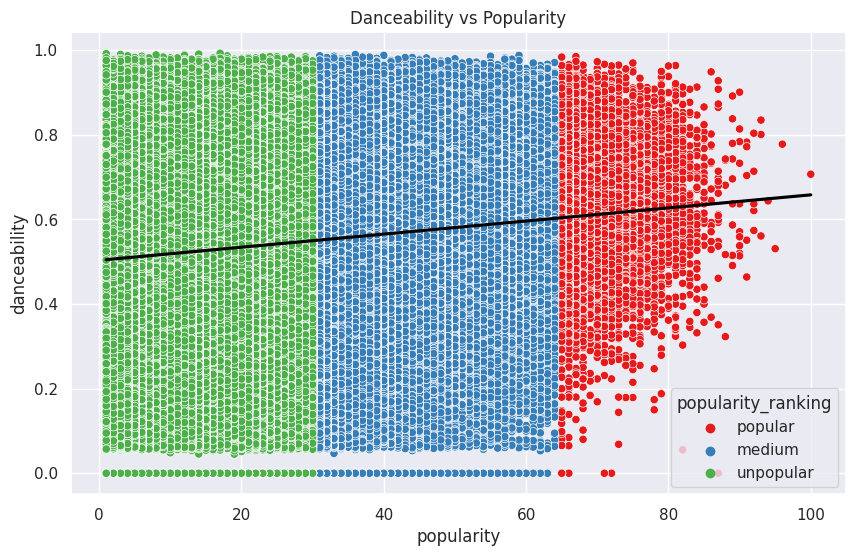

In [129]:
# Danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='danceability', data = data_classified, hue = 'popularity_ranking', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Danceability vs Popularity')
sns.regplot(x='popularity', y='danceability', data=data_classified, scatter=False, color='black')
plt.show()

The trendline danceability vs popularity shows a positive correlation.

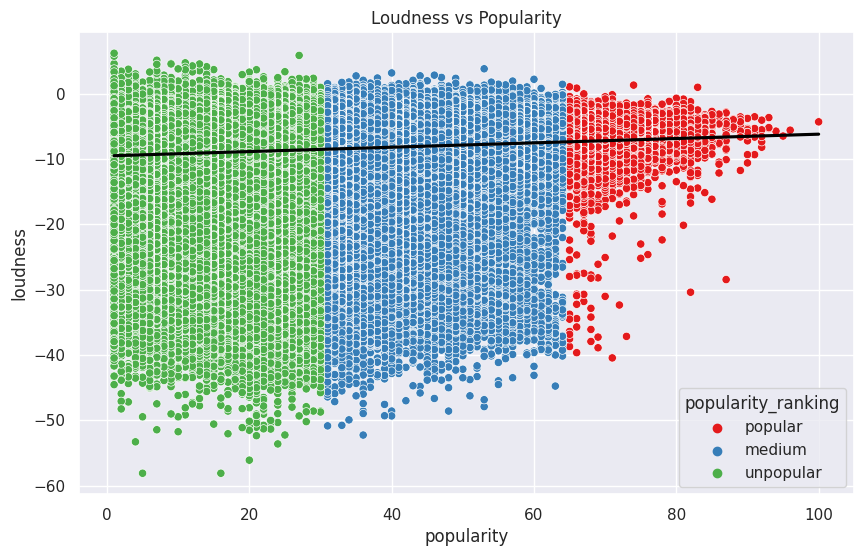

In [133]:
# Loudness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='loudness', data = data_classified, hue = 'popularity_ranking', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Loudness')
plt.title('Loudness vs Popularity')
sns.regplot(x='popularity', y='loudness', data=data_classified, scatter=False, color='black')
plt.show()

The trendline loudness vs popularity shows a positive correlation.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


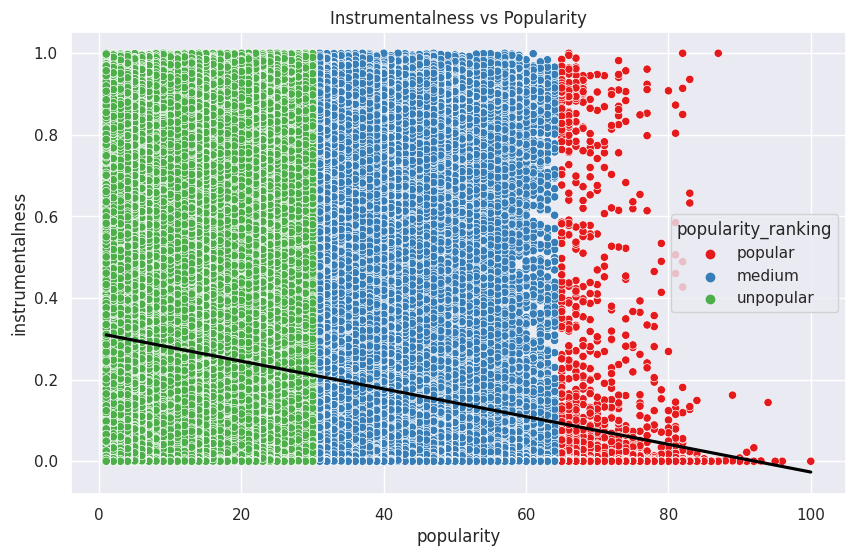

In [134]:
# Instrumentalness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='instrumentalness', data = data_classified, hue = 'popularity_ranking', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Instrumentalness')
plt.title('Instrumentalness vs Popularity')
sns.regplot(x='popularity', y='instrumentalness', data=data_classified, scatter=False, color='black')
plt.show()

The trendline instrumentalness vs popularity shows a negative correlation.

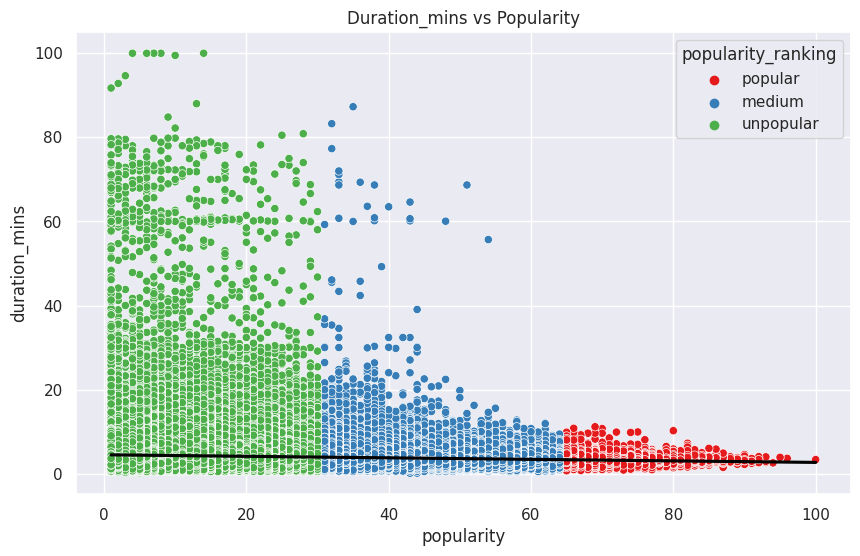

In [135]:
# Duration_mins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='duration_mins', data = data_classified, hue = 'popularity_ranking', palette='Set1')
plt.xlabel('Popularity')
plt.ylabel('Duration_mins')
plt.title('Duration_mins vs Popularity')
sns.regplot(x='popularity', y='duration_mins', data=data_classified, scatter=False, color='black')
plt.show()

The trendline duration_mins vs popularity shows a negative correlation.

In [136]:
def chi_square_test(df, target, features):
    for feature in features:
        print(f"Chi-Square test for {feature} and {target}:\n")

        # Create a contingency table
        contingency_table = pd.crosstab(df[feature], df[target])

        # Perform Chi-Square test
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)

        #Calculate and show incidence
        contingency_table['odds_ratio'] = contingency_table['unpopular'] / contingency_table['medium'] / contingency_table['popular']

        print(contingency_table)

        # Print chi square statistics and p-value
        print("Chi-square statistic:", chi2)
        print(f"\np-value: {p}\n")

        # Significance level alpha = 0.05
        if p < 0.05:
            print(f"The relationship between {feature} and {target} is statistically significant.\n")
        else:
            print(f"The relationship between {feature} and {target} is NOT statistically significant.\n")

        print("=" * 50)

# List of feature variables
feature_vars = ['genre', 'year', 'danceability',
                'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']

# Assuming df is your DataFrame containing the feature and target variables
# Perform Chi-Square tests
chi_square_test(data_classified, 'popularity_ranking', feature_vars)

Chi-Square test for genre and popularity_ranking:

popularity_ranking  medium  popular  unpopular  odds_ratio
genre                                                     
acoustic              3776       19      15598    0.217412
afrobeat               752        4       8164    2.714096
alt-rock             16176      271       4347    0.000992
ambient               4744       33      15281    0.097610
black-metal            674        0      19150         inf
...                    ...      ...        ...         ...
swedish               2206       18       9280    0.233706
tango                   26        0       6479         inf
techno                1005        1       5435    5.407960
trance                1227        1       6927    5.645477
trip-hop               196        0       8064         inf

[82 rows x 4 columns]
Chi-square statistic: 317306.9597483997

p-value: 0.0

The relationship between genre and popularity_ranking is statistically significant.

Chi-Square test for

# Normalisation

In [143]:
# Min max normalisation
data_normalised = data_classified[['popularity','year', 'danceability',
                'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'time_signature']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler and transform the DataFrame
data_scaled = scaler.fit_transform(data_normalised)

# Convert back to DataFrame for readability
data_scaled = pd.DataFrame(data_scaled, columns=data_normalised.columns)

In [144]:
check(data_normalised)

,Column,Data types,Number of unique values,Number of missing values,Number of rows
0,popularity,int64,97,0,1001373
1,year,int64,24,0,1001373
2,danceability,float64,1361,0,1001373
3,energy,float64,3079,0,1001373
4,key,int64,12,0,1001373
5,loudness,float64,36441,0,1001373
6,mode,int64,2,0,1001373
7,speechiness,float64,1654,0,1001373
8,acousticness,float64,5398,0,1001373
9,instrumentalness,float64,5402,0,1001373


In [145]:
data_normalised.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,time_signature
count,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06,1.001373e+06
mean,2.129085e+01,2.012402e+03,5.363992e-01,6.428674e-01,5.281454e+00,-8.830127e+00,6.349272e-01,9.340289e-02,3.153963e-01,2.408593e-01,2.241756e-01,4.522004e-01,1.214418e+02,4.100299e+00,3.889541e+00
std,1.517754e+01,6.731271e+00,1.831011e-01,2.683754e-01,3.556199e+00,5.642178e+00,4.814508e-01,1.295901e-01,3.488115e-01,3.600826e-01,2.029890e-01,2.671552e-01,2.998246e+01,2.322311e+00,4.554628e-01
min,1.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.435000e-02,0.000000e+00
25%,9.000000e+00,2.007000e+03,4.140000e-01,4.610000e-01,2.000000e+00,-1.057800e+01,0.000000e+00,3.670000e-02,7.110000e-03,0.000000e+00,9.840000e-02,2.250000e-01,9.823200e+01,3.028450e+00,4.000000e+00
50%,1.800000e+01,2.013000e+03,5.490000e-01,6.970000e-01,5.000000e+00,-7.288000e+00,1.000000e+00,5.000000e-02,1.460000e-01,1.150000e-03,1.340000e-01,4.330000e-01,1.210800e+02,3.743817e+00,4.000000e+00
75%,3.100000e+01,2.018000e+03,6.740000e-01,8.730000e-01,8.000000e+00,-5.194000e+00,1.000000e+00,8.890000e-02,6.180000e-01,5.520000e-01,2.920000e-01,6.680000e-01,1.399860e+02,4.688450e+00,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.700000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.497920e+02,1.000083e+02,5.000000e+00


All quantified target and feature variables are normalized by min-max normalisation.

# References

https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks?resource=download&select=spotify_data.csv
https://www.masterclass.com/articles/guide-to-time-signatures-in-music
https://github.com/Matildasoric44/Spotify-Popularity-Analysis-Song-Recommendation-Model/blob/main/Notebook/Project2_NoteBook%20(1).ipynb
https://github.com/twillstw/Spotify-Popularity-Prediction/blob/master/Predicting_Song_Popularity.ipynb
https://www.kaggle.com/code/sauravpalekar/spotify-song-popularity-prediction/notebook
https://www.kaggle.com/code/abhilashbk/spotify-analysis